We aim to analyze the GradeClass based on the supplied variables in the dataset using PCA.

In [1]:
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install numpy

In [5]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

student_data = pd.read_csv('student_data.csv')

In [6]:
y = student_data['GradeClass']
X = student_data.drop(columns=['GPA', 'GradeClass', 'StudentID'])

scaler = StandardScaler()
x = scaler.fit_transform(X)
pca = PCA(n_components=None)
pca.fit(x)

components = pca.components_
explained_variance = pca.explained_variance_ratio_

pca_df = pd.DataFrame(pca.components_, columns=X.columns)

In [7]:
top_3_pcs = pca_df.head(3)
top_3_explained_variance = explained_variance[:3]

top_3_pcs_with_variance = pd.DataFrame(top_3_pcs)
top_3_pcs_with_variance['Explained Variance'] = top_3_explained_variance

importance_scores = top_3_pcs.abs().sum(axis=0)
most_important_variables = importance_scores.nlargest(3)

print(most_important_variables)

Sports               0.980210
ParentalEducation    0.903771
Absences             0.876216
dtype: float64


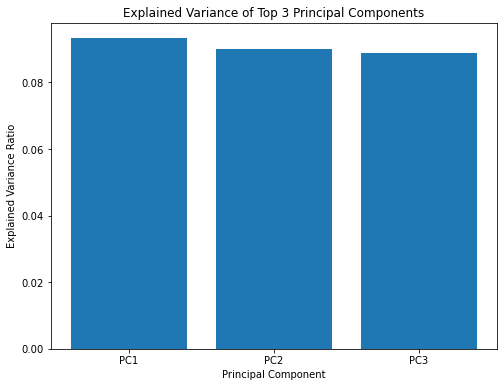

In [8]:
# Explained Variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, 4), top_3_explained_variance, tick_label=['PC1', 'PC2', 'PC3'])
plt.title('Explained Variance of Top 3 Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [10]:
eigenvalues = pca.explained_variance_

loadings = pca.components_**2
cos2_values = loadings / eigenvalues[:, np.newaxis]

cos2_df = pd.DataFrame(cos2_values, columns=X.columns, index=[f'PC{i+1}' for i in range(len(eigenvalues))])

print("Eigenvalues of the components:")
print(eigenvalues)

print("\nCos² values:")
print(cos2_df)


Eigenvalues of the components:
[1.11994898 1.07943011 1.06629477 1.04141408 1.02271036 1.01325574
 0.99239356 0.96810808 0.96018685 0.94727708 0.92117161 0.87282761]

Cos² values:
           Age    Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
PC1   0.181266  0.118799   0.021059           0.080521         0.003565   
PC2   0.058340  0.004781   0.007382           0.085986         0.211831   
PC3   0.008686  0.056668   0.001209           0.083740         0.100485   
PC4   0.204433  0.055934   0.393755           0.001539         0.049679   
PC5   0.009846  0.132690   0.065882           0.182389         0.003194   
PC6   0.000451  0.073238   0.244019           0.097162         0.000249   
PC7   0.051133  0.017398   0.019335           0.164252         0.000003   
PC8   0.141186  0.255425   0.012682           0.028860         0.109230   
PC9   0.033830  0.013721   0.015519           0.033361         0.372906   
PC10  0.020117  0.189913   0.000237           0.001076         0.05485

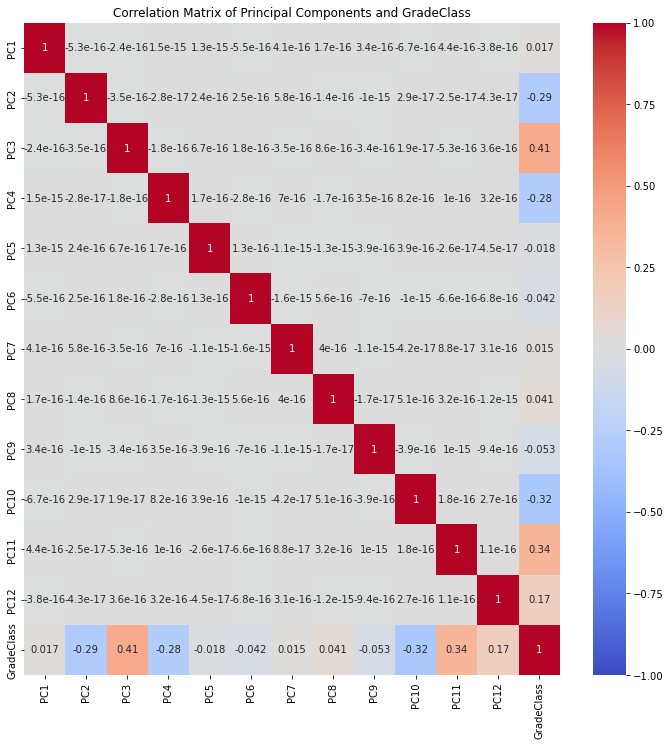

In [13]:
# Correlation Matrix
X_pca = pca.transform(x)

pca_df_transformed = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
pca_df_transformed['GradeClass'] = y.values
corr_matrix = pca_df_transformed.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Principal Components and GradeClass')
plt.show()

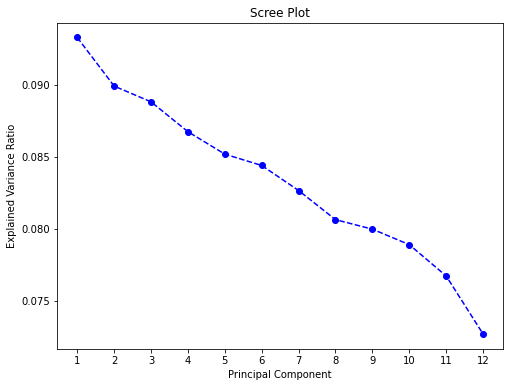

In [8]:
# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, len(explained_variance) + 1, step=1))
plt.show()

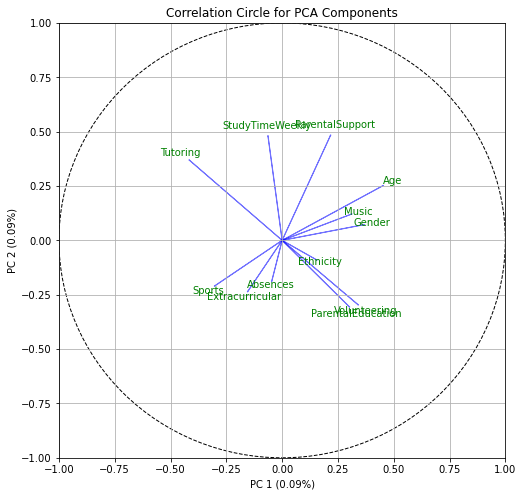

In [9]:
# Correlation Circle
def plot_correlation_circle(pca, X, component_1=0, component_2=1):
    pcs = pca.components_
    n = len(pcs[0])
    
    fig, ax = plt.subplots(figsize=(8, 8))
    circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='--')
    ax.add_artist(circle)

    for i in range(n):
        plt.arrow(0, 0, pcs[component_1, i], pcs[component_2, i], color='b', alpha=0.5)
        plt.text(pcs[component_1, i] * 1.1, pcs[component_2, i] * 1.1, X.columns[i], color='g', ha='center', va='center')

    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel(f'PC {component_1+1} ({pca.explained_variance_ratio_[component_1]:.2f}%)')
    plt.ylabel(f'PC {component_2+1} ({pca.explained_variance_ratio_[component_2]:.2f}%)')
    plt.grid()
    plt.title('Correlation Circle for PCA Components')
    plt.show()

plot_correlation_circle(pca, X, component_1=0, component_2=1)

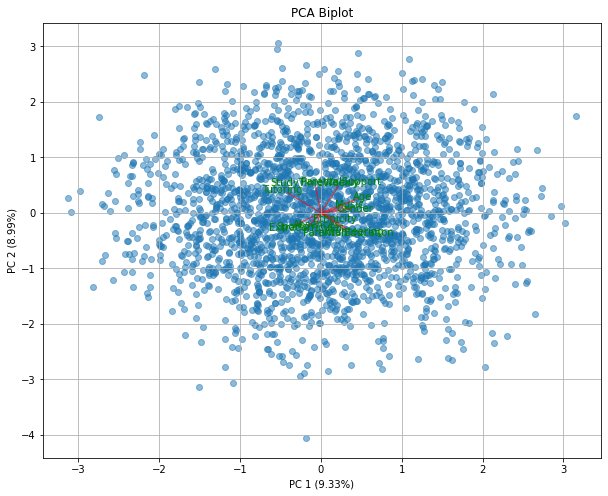

In [11]:
# Biplot
def pca_biplot(pca, X_pca, X, component_1=0, component_2=1):
    plt.figure(figsize=(10, 8))

    plt.scatter(X_pca[:, component_1], X_pca[:, component_2], alpha=0.5)

    for i, feature in enumerate(X.columns):
        plt.arrow(0, 0, pca.components_[component_1, i], pca.components_[component_2, i], color='r', alpha=0.5)
        plt.text(pca.components_[component_1, i] * 1.15, pca.components_[component_2, i] * 1.15, feature, color='g', ha='center', va='center')

    plt.xlabel(f'PC {component_1+1} ({pca.explained_variance_ratio_[component_1]*100:.2f}%)')
    plt.ylabel(f'PC {component_2+1} ({pca.explained_variance_ratio_[component_2]*100:.2f}%)')
    plt.grid()
    plt.title('PCA Biplot')
    plt.show()

X_pca = pca.transform(x)

pca_biplot(pca, X_pca, X, component_1=0, component_2=1)